In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv("concrete_damping_dataset.csv")

In [7]:
print(df.columns.tolist())

['Rubber_content', 'Aggregate_size', 'Water_cement_ratio', 'Compressive_strength', 'Flexural_strength', 'Damping_ratio', 'Cement_content', 'Fine_aggregate_content', 'Coarse_aggregate_content', 'Crumb_rubber_kg_m3', 'Water_kg', 'Water_percent']


In [8]:
# Features and target
X = df[[
    "Cement_content", 
    "Fine_aggregate_content", 
    "Coarse_aggregate_content", 
    "Rubber_content", 
    "Water_cement_ratio", 
    "Water_percent"
]]
y = df["Damping_ratio"]

In [12]:
 #Train-test split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Save model
import joblib
joblib.dump(model, "damping_model.pkl")

Model Performance:
RMSE: 0.0048
MAE: 0.0036
R²: 0.9923
MAPE: 4.84%


['damping_model.pkl']

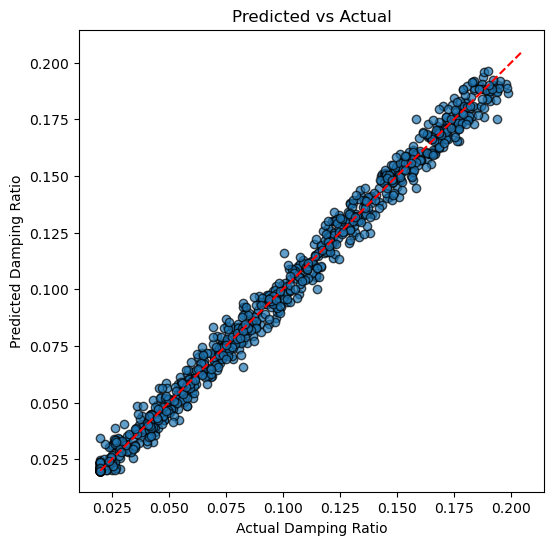

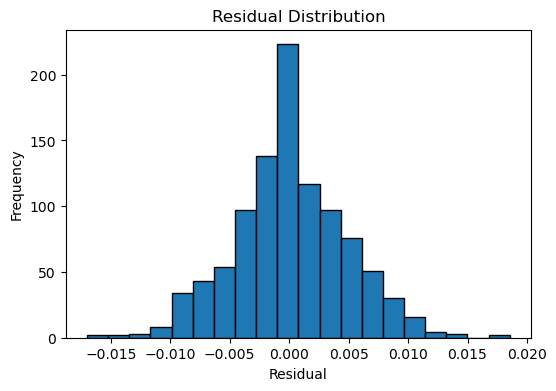

In [13]:
# ----- Visualization -----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Damping Ratio")
plt.ylabel("Predicted Damping Ratio")
plt.title("Predicted vs Actual")
plt.show()

plt.figure(figsize=(6,4))
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

**APP UI**

In [16]:
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("damping_model.pkl")

# ---------------- PAGE SETUP ----------------
st.set_page_config(
    page_title="Concrete Damping Ratio Predictor",
    page_icon="🧱",
    layout="centered"
)

# ---------------- HEADER ----------------
st.title("🧱 Concrete Damping Ratio Prediction")
st.markdown("""
Welcome to the **Concrete Mix Predictor**

Enter your mix proportions below and get an instant **damping ratio** prediction.
""")
st.info("💡 *Tip: Adjust inputs carefully to explore how mix proportions affect damping behavior.*")

# ---------------- INPUT FORM ----------------
st.subheader("🔧 Input Concrete Mix Parameters")

col1, col2 = st.columns(2)

with col1:
    cement = st.number_input("Cement content (kg/m³)", min_value=100, max_value=600, value=300)
    sand = st.number_input("Fine aggregate (kg/m³)", min_value=200, max_value=1200, value=700)
    coarse = st.number_input("Coarse aggregate (kg/m³)", min_value=300, max_value=1500, value=1000)

with col2:
    rubber = st.number_input("Rubber content (kg/m³)", min_value=0, max_value=400, value=50)
    wcr = st.number_input("Water-to-cement ratio", min_value=0.2, max_value=1.0, value=0.5, step=0.01)
    water_percent = st.number_input("Water (%)", min_value=2.0, max_value=15.0, value=7.0, step=0.1)

# ---------------- PREDICTION ----------------
if st.button("🔮 Predict Damping Ratio"):
    input_data = pd.DataFrame([[
        cement, sand, coarse, rubber, wcr, water_percent
    ]], columns=[
        "Cement_content", 
        "Fine_aggregate_content", 
        "Coarse_aggregate_content", 
        "Rubber_content", 
        "Water_cement_ratio", 
        "Water_percent"
    ])
    
    prediction = model.predict(input_data)[0]
    
    st.success(f"Predicted Damping Ratio: **{prediction:.4f}**")

2025-09-04 09:02:29.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 09:02:29.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar